In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import sys

In [ ]:
os . chdir ( "/content/gdrive/My Drive/Hackathon/WNS_Analytics_Wizard_2018/dataset")

In [ ]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv("train_LZdllcl.csv")
data.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


Nulls in Education and previous_year_rating

In [ ]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


# EDA

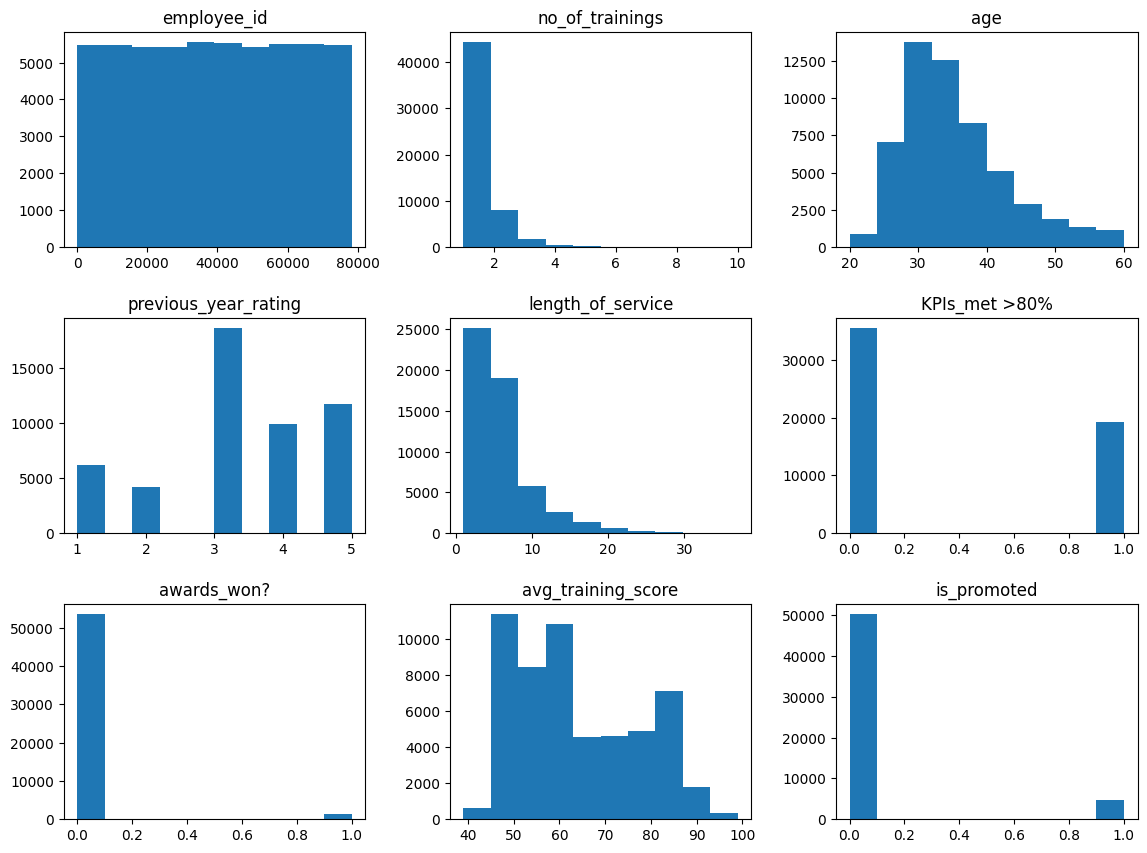

In [ ]:
fig, ax = plt.subplots(3,3,figsize = (12,9))
fig.tight_layout(pad=3)

for i in range(3):
    for j in range(3):
        ax[i][j].hist(data[data.describe().columns[3*i + j]])
        ax[i][j].set_title(data.describe().columns[3*i + j])

Columns like length of service and no of trainings are highly skewed

## Checking department wise promotion percentage

In [ ]:
sub_data = data.groupby(["department", "is_promoted"]).count()["employee_id"].reset_index(level = 1).rename(columns = {"employee_id" : "count"}).join(data.groupby(["department"]).count()["employee_id"])
sub_data.rename(columns = {"employee_id" : "count_total"}, inplace = True)
sub_data["percentage"] = 100*sub_data["count"]/sub_data["count_total"]
sub_data = sub_data[sub_data["is_promoted"] == 1].sort_values(by = "percentage")
sub_data

,is_promoted,count,count_total,percentage
department,,,,
Legal,1,53,1039,5.101059
HR,1,136,2418,5.624483
R&D,1,69,999,6.906907
Sales & Marketing,1,1213,16840,7.203088
Finance,1,206,2536,8.123028
Operations,1,1023,11348,9.014804
Analytics,1,512,5352,9.566517
Procurement,1,688,7138,9.638554
Technology,1,768,7138,10.759316


Text(0, 0.5, 'Percentage')

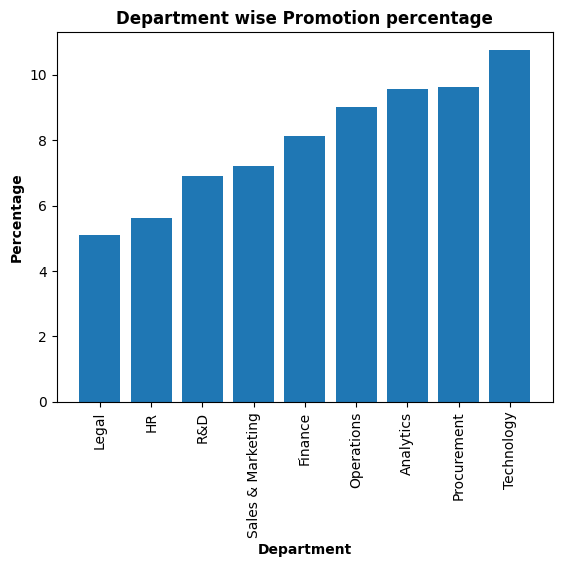

In [ ]:
plt.bar(sub_data.index, sub_data["percentage"])
plt.xlabel('Department', fontweight='bold')
plt.xticks(sub_data.index, rotation = 90)
plt.title("Department wise Promotion percentage", fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')

Highest promotion in Technology department

## Null value treatment for previous year rating

In [ ]:
data["previous_year_rating"].fillna(data.groupby(["department"])["previous_year_rating"].transform("mean").round(0).astype(int), inplace = True)

## Null value for Education

In [ ]:
data["education"].fillna("X", inplace = True)

Thus data is complete now without null values

#Further EDA

In [ ]:
sub_data2 = data.pivot_table(index = ["department", "recruitment_channel"],
                 values = "employee_id",
                 aggfunc = "count").unstack()

sub_data2

employee_id                  
recruitment_channel       other referred sourcing
department                                       
Analytics                  2973       83     2296
Finance                    1463        5     1068
HR                         1380      103      935
Legal                       590       14      435
Operations                 6279      238     4831
Procurement                4002       79     3057
R&D                         555       19      425
Sales & Marketing          9290      259     7291
Technology                 3914      342     2882

In [ ]:
sub_data1 = data[data["is_promoted"] == 1].pivot_table(index = ["department", "recruitment_channel"],
                 values = "employee_id",
                 aggfunc = "count").unstack()

sub_data1.columns = sub_data1.columns.get_level_values(1)

sub_data2 = data.pivot_table(index = ["department", "recruitment_channel"],
                 values = "employee_id",
                 aggfunc = "count").unstack()

sub_data2.columns = sub_data2.columns.get_level_values(1)

sub_data1 = sub_data1.join(sub_data2, rsuffix = "_total")
sub_data1.fillna(0, inplace = True)
sub_data1.head()

recruitment_channel,other,referred,sourcing,other_total,referred_total,sourcing_total
department,,,,,,
Analytics,268.0,15.0,229.0,2973,83,2296
Finance,111.0,0.0,95.0,1463,5,1068
HR,69.0,8.0,59.0,1380,103,935
Legal,30.0,6.0,17.0,590,14,435
Operations,562.0,23.0,438.0,6279,238,4831


In [ ]:
for i in range(3):
    sub_data1[sub_data1.columns[i]] = sub_data1[sub_data1.columns[i]]*100/sub_data1[sub_data1.columns[i+3]]
sub_data1.sort_values(by = ["other"], inplace = True)
sub_data1

recruitment_channel,other,referred,sourcing,other_total,referred_total,sourcing_total
department,,,,,,
HR,5.000000,7.766990,6.310160,1380,103,935
Legal,5.084746,42.857143,3.908046,590,14,435
Sales & Marketing,7.072121,13.127413,7.159512,9290,259,7291
R&D,7.207207,5.263158,6.588235,555,19,425
Finance,7.587150,0.000000,8.895131,1463,5,1068
Operations,8.950470,9.663866,9.066446,6279,238,4831
Analytics,9.014464,18.072289,9.973868,2973,83,2296
Procurement,9.845077,22.784810,9.028459,4002,79,3057
Technology,10.858457,9.649123,10.756419,3914,342,2882


Text(0.5, 1.0, 'Promotion percentage vs recruitment channel')

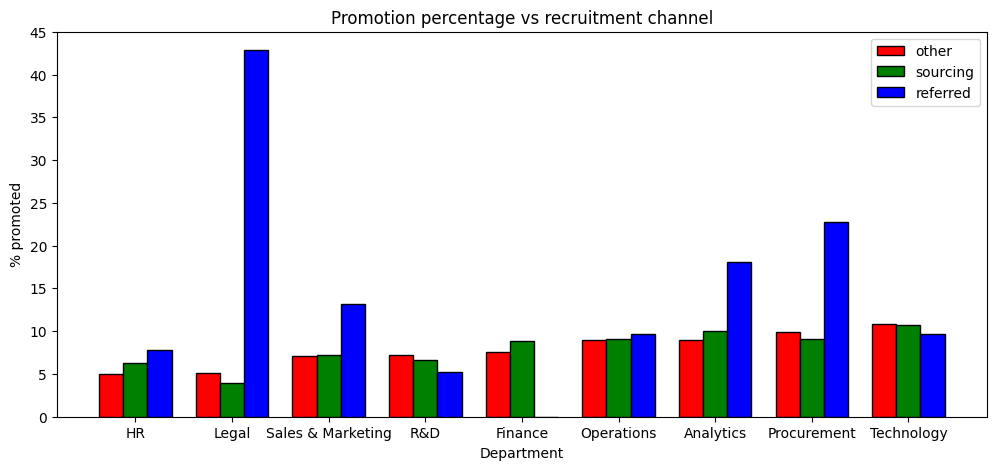

In [ ]:
r = np.arange(0,36,4)
plt.figure(figsize=(12,5))
plt.bar(r-1,sub_data1["other"], color='red', width=1, edgecolor='black', label='other')
plt.bar(r,sub_data1["sourcing"], color='green', width=1, edgecolor='black', label='sourcing')
plt.bar(r+1,sub_data1["referred"], color='blue', width=1, edgecolor='black', label='referred')

plt.xlabel("Department")
plt.xticks(r, sub_data1.index)
plt.ylabel("% promoted")
plt.legend()
plt.title("Promotion percentage vs recruitment channel")

The above graph has been plotted as follows:


1.   The number of people promoted in each department via each channel of  recruitment channel was found
2.   The number of people in each department via each channel of recruitment was found
3.   The above two metrics were divided to find the %



# Outlier Treatment

In [ ]:
data.describe(percentiles=[0.005, 0.05, 0.25, 0.75, 0.95, 0.995])

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.330463,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.218668,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
0.5%,393.035000,1.000000,22.000000,1.000000,1.000000,0.000000,0.000000,44.000000,0.000000
5%,3916.350000,1.000000,25.000000,1.000000,1.000000,0.000000,0.000000,47.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
95%,74415.300000,2.000000,51.000000,5.000000,15.000000,1.000000,0.000000,86.000000,1.000000


#### Average Training Score

In [ ]:
data["avg_training_score"] = data["avg_training_score"].apply(lambda x : x if x <= 94.0 else 94.0)
data["avg_training_score"] = data["avg_training_score"].apply(lambda x : x if x >= 44.0 else 44.0)

#### Number of Trainings

In [ ]:
data["no_of_trainings"] = data["no_of_trainings"].apply(lambda x : x if x <= 4.0 else 4.0)

#### Age

In [ ]:
data["age"] = data["age"].apply(lambda x : 59.0 if x>59.0 else x)
data["age"] = data["age"].apply(lambda x : 22.0 if x<22.0 else x)

#### Length of service

In [ ]:
data["length_of_service"] = data["length_of_service"].apply(lambda x : x if x<=24.0 else 24.0)

array([[<Axes: title={'center': 'employee_id'}>,
        <Axes: title={'center': 'no_of_trainings'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'previous_year_rating'}>,
        <Axes: title={'center': 'length_of_service'}>,
        <Axes: title={'center': 'KPIs_met >80%'}>],
       [<Axes: title={'center': 'awards_won?'}>,
        <Axes: title={'center': 'avg_training_score'}>,
        <Axes: title={'center': 'is_promoted'}>]], dtype=object)

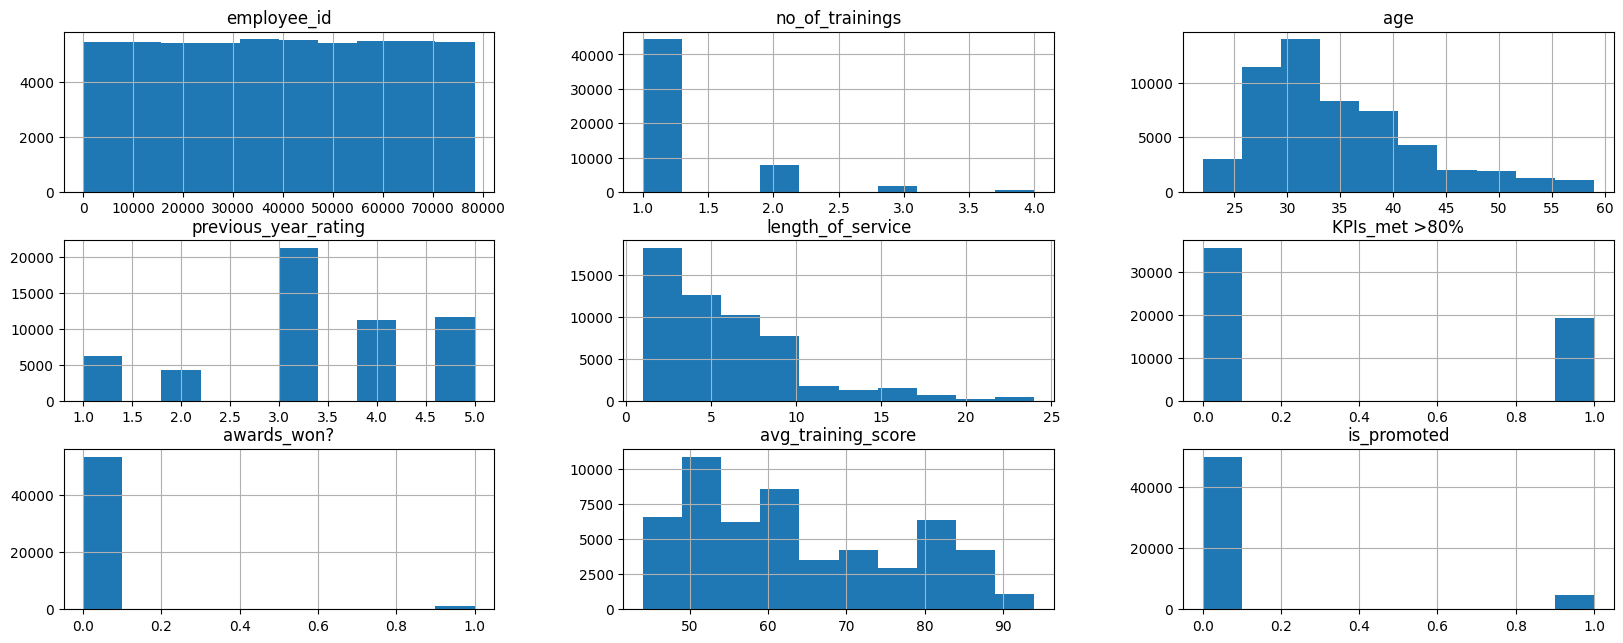

In [ ]:
data[data.dtypes[(data.dtypes=="float64")|(data.dtypes=="int64")]
                        .index.values].hist(figsize=[20,7.5])

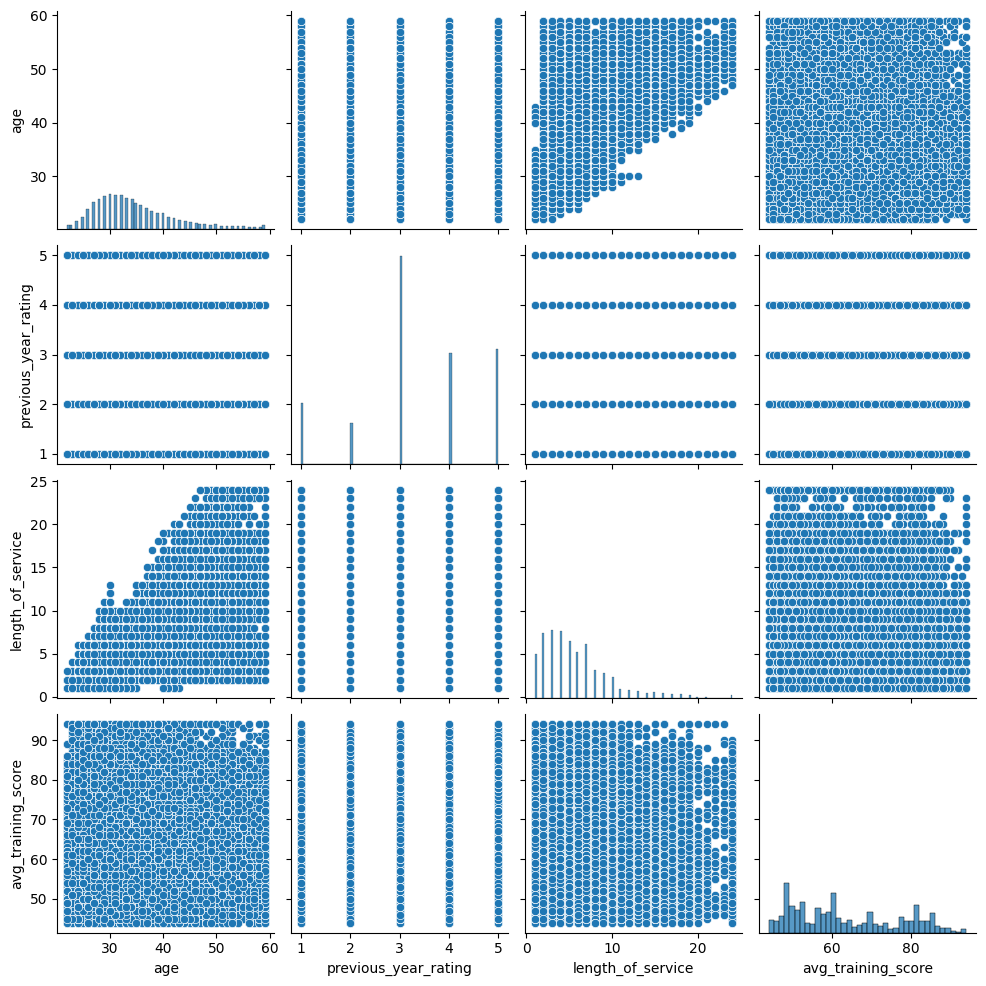

In [ ]:
sns.pairplot(data, palette="husl", vars = ['age', 'previous_year_rating','length_of_service','avg_training_score'])

plt.show()

In [ ]:
sub_data1 = data[["length_of_service", "is_promoted"]]
sub_data1["grouped_los"] = pd.cut(data.loc[:, "length_of_service"], bins = 8)

sub_data = sub_data1.groupby(["grouped_los", "is_promoted"]).count().unstack()
sub_data.columns = sub_data.columns.get_level_values(1).astype(str)
sub_data["total_counts"] = sub_data1["grouped_los"].value_counts()

#sub_data[[0, 1]] = sub_data[[0, 1]].div(sub_data['total_counts'], axis=0)

sub_data = sub_data.assign(**{col: sub_data[col]*100 / sub_data['total_counts'] for col in ['0', '1']})
sub_data

is_promoted,0,1,total_counts
grouped_los,,,
"(0.977, 3.875]",91.343627,8.656373,18264
"(3.875, 6.75]",91.529709,8.470291,17402
"(6.75, 9.625]",91.304348,8.695652,11063
"(9.625, 12.5]",90.699462,9.300538,3903
"(12.5, 15.375]",93.110990,6.889010,1829
"(15.375, 18.25]",93.294461,6.705539,1372
"(18.25, 21.125]",91.401869,8.598131,535
"(21.125, 24.0]",94.545455,5.454545,440


Text(0.5, 1.0, 'Promotion percentage vs length of service grouped')

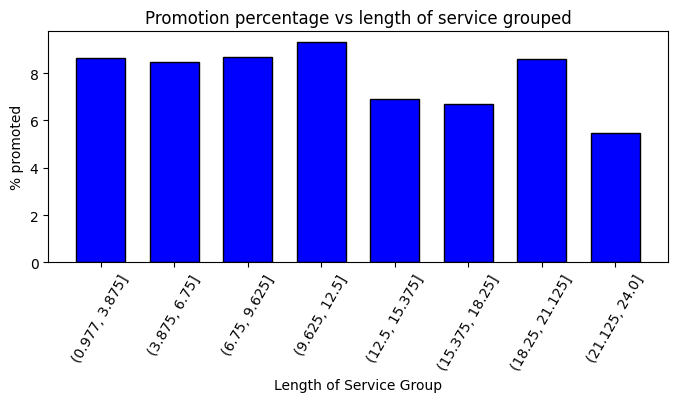

In [ ]:
r = np.arange(0,12,1.5)
plt.figure(figsize=(8,3))

plt.bar(r,sub_data["1"], color='blue', width=1, edgecolor='black', label='referred')

plt.xlabel("Length of Service Group")
plt.xticks(r, sub_data.index, rotation = 60)
plt.ylabel("% promoted")
plt.title("Promotion percentage vs length of service grouped")

People in the age group of 10 to 12 years have the highest promotion percentage. Additionally the promotion percentage suddently spikes for the age group 19 to 21 years. This could be due to managerial position upgrade

# Feature Engineering

In [ ]:
data["new_score"] = (max(data["age"]) - data["age"])*(max(data["length_of_service"]) - data["length_of_service"])*data["previous_year_rating"]

In [ ]:
data["new_score"] = pd.cut(data["new_score"], bins = 10)
data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,new_score
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1.0,35.0,5.0,8.0,1,0,49.0,0,"(1656.0, 2070.0]"
1,65141,Operations,region_22,Bachelor's,m,other,1.0,30.0,5.0,4.0,0,0,60.0,0,"(2898.0, 3312.0]"
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1.0,34.0,3.0,7.0,0,0,50.0,0,"(1242.0, 1656.0]"
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2.0,39.0,1.0,10.0,0,0,50.0,0,"(-4.14, 414.0]"
4,48945,Technology,region_26,Bachelor's,m,other,1.0,45.0,3.0,2.0,0,0,73.0,0,"(828.0, 1242.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1.0,48.0,3.0,17.0,0,0,78.0,0,"(-4.14, 414.0]"
54804,74592,Operations,region_27,Master's & above,f,other,1.0,37.0,2.0,6.0,0,0,56.0,0,"(414.0, 828.0]"
54805,13918,Analytics,region_1,Bachelor's,m,other,1.0,27.0,5.0,3.0,1,0,79.0,0,"(3312.0, 3726.0]"
54806,13614,Sales & Marketing,region_9,X,m,sourcing,1.0,29.0,1.0,2.0,0,0,45.0,0,"(414.0, 828.0]"


In [ ]:
for key,row in data.iterrows():
    data.loc[key,'start'] = row['new_score'].left
    data.loc[key,'end'] = row['new_score'].right

In [ ]:
data['mean_new_score'] = (data["start"] + data["end"])/2

In [ ]:
sub_data1 = data.pivot_table(index = ["mean_new_score", "is_promoted"],
                 values = "employee_id",
                 aggfunc = "count").unstack()
sub_data1.columns = sub_data1.columns.get_level_values(1).astype(str)

sub_data2 = data["mean_new_score"].value_counts()
sub_data1 = sub_data1.join(sub_data2)
sub_data1 = sub_data1.assign(**{col: sub_data1[col]*100 / sub_data1['count'] for col in ['0', '1']})
sub_data1

,0,1,count
mean_new_score,,,
204.93,95.344629,4.655371,6079
621.00,95.824769,4.175231,7784
1035.00,92.321755,7.678245,7658
1449.00,91.492569,8.507431,9286
1863.00,90.763475,9.236525,8553
2277.00,88.942436,11.057564,7470
2691.00,87.337986,12.662014,4012
3105.00,86.830835,13.169165,2802
3519.00,82.579186,17.420814,884


Text(0, 0.5, '% promotion')

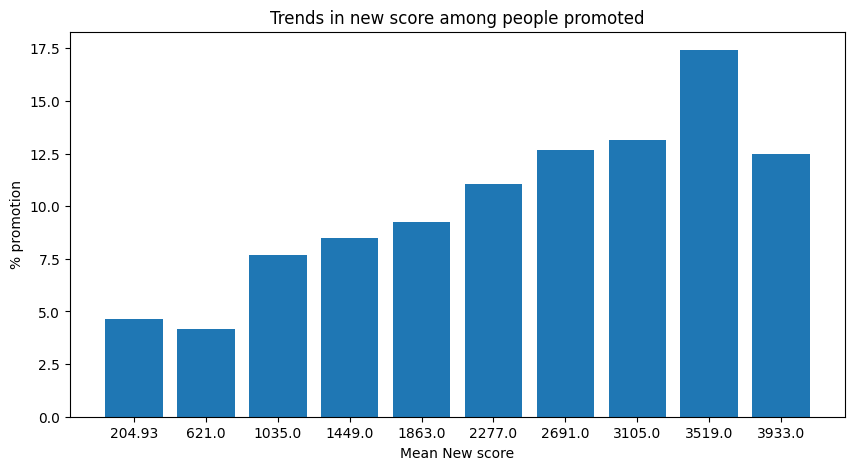

In [ ]:
r = np.arange(10)
plt.figure(figsize = (10,5))
plt.bar(r, sub_data1["1"])

plt.title("Trends in new score among people promoted")
plt.xticks(r, sub_data1.index)
plt.xlabel("Mean New score")
plt.ylabel("% promotion")

New score is calculated as follows:

1.   max(age) - age
2.   max(length of service) - (length of service)
3.   Previous year rating



##### Investigating the employees with mean new score 3519

In [ ]:
temp = data[(data["mean_new_score"] == 3519.0) & (data["is_promoted"] == 1)]

Text(0.5, 1.0, 'Previous year rating distribution')

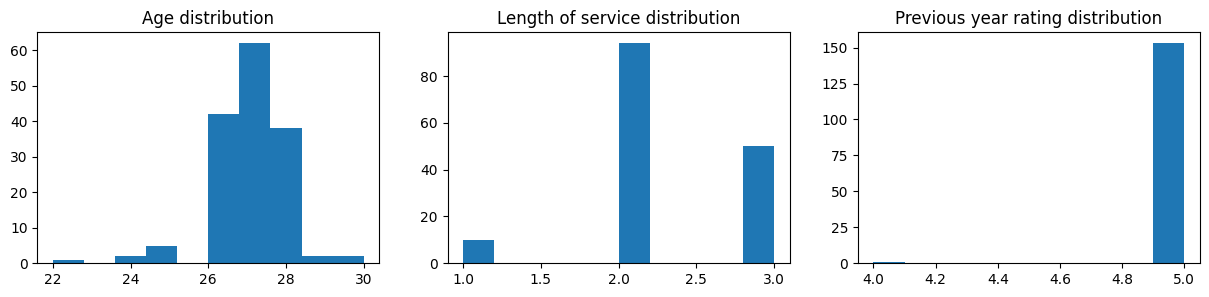

In [ ]:
fig,ax = plt.subplots(1,3, figsize = (15,3))

ax[0].hist(temp["age"])
ax[0].set_title("Age distribution")
##################################
ax[1].hist(temp["length_of_service"])
ax[1].set_title("Length of service distribution")
##################################
ax[2].hist(temp["previous_year_rating"])
ax[2].set_title("Previous year rating distribution")

### New Feature : Length of service / Age

(array([ 735., 1096.,  837.,  803.,  567.,  385.,  133.,   72.,   35.,
           5.]),
 array([0.02380952, 0.07142857, 0.11904762, 0.16666667, 0.21428571,
        0.26190476, 0.30952381, 0.35714286, 0.4047619 , 0.45238095,
        0.5       ]),
 <BarContainer object of 10 artists>)

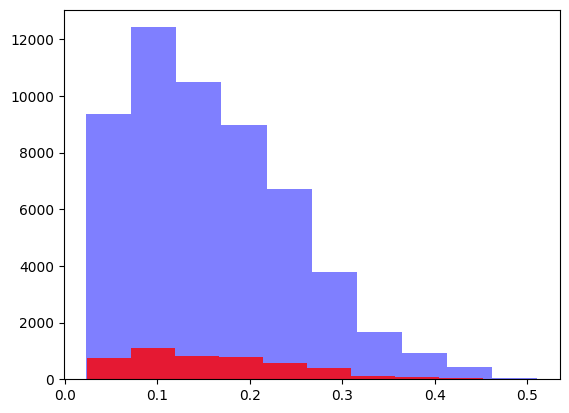

In [ ]:
data["los_age"] = data["length_of_service"]/data["age"]

plt.hist(data["los_age"], color = "blue", alpha = 0.5)
plt.hist(data.loc[data["is_promoted"] == 1, "los_age"], alpha = 0.8, color = "red")

([<matplotlib.axis.XTick at 0x7e9322d98ca0>,
 [Text(0, 0, '(0.0964, 0.121]'),
  Text(1, 0, '(0.072, 0.0964]'),
  Text(2, 0, '(0.121, 0.145]'),
  Text(3, 0, '(0.145, 0.169]'),
  Text(4, 0, '(0.0228, 0.0476]'),
  Text(5, 0, '(0.169, 0.194]'),
  Text(6, 0, '(0.0476, 0.072]'),
  Text(7, 0, '(0.194, 0.218]'),
  Text(8, 0, '(0.218, 0.243]'),
  Text(9, 0, '(0.243, 0.267]'),
  Text(10, 0, '(0.267, 0.291]'),
  Text(11, 0, '(0.291, 0.316]'),
  Text(12, 0, '(0.316, 0.34]'),
  Text(13, 0, '(0.34, 0.364]'),
  Text(14, 0, '(0.364, 0.389]'),
  Text(15, 0, '(0.389, 0.413]'),
  Text(16, 0, '(0.413, 0.438]'),
  Text(17, 0, '(0.438, 0.462]'),
  Text(18, 0, '(0.462, 0.486]'),
  Text(19, 0, '(0.486, 0.511]')])

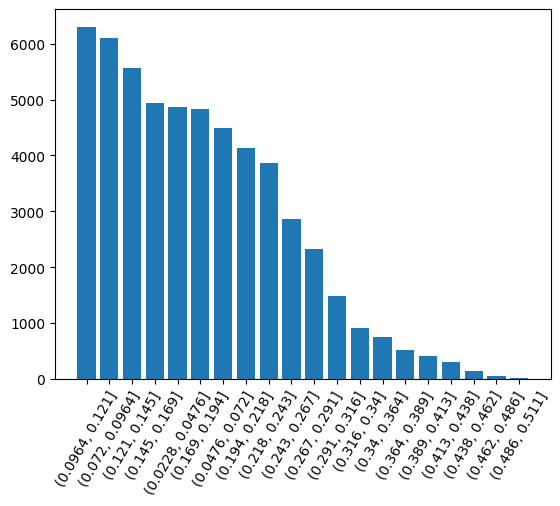

In [ ]:
temp = data.copy()
bi = 20
temp["range_los_age"] = pd.cut(data["los_age"], bins = bi)
plt.bar(np.arange(bi), pd.cut(data["los_age"], bins = bi).value_counts())
plt.xticks(np.arange(bi),pd.cut(data["los_age"], bins = bi).value_counts().index, rotation = 60)

Text(0.5, 1.0, 'Promotion percentage vs Ratio of Length of service to Age')

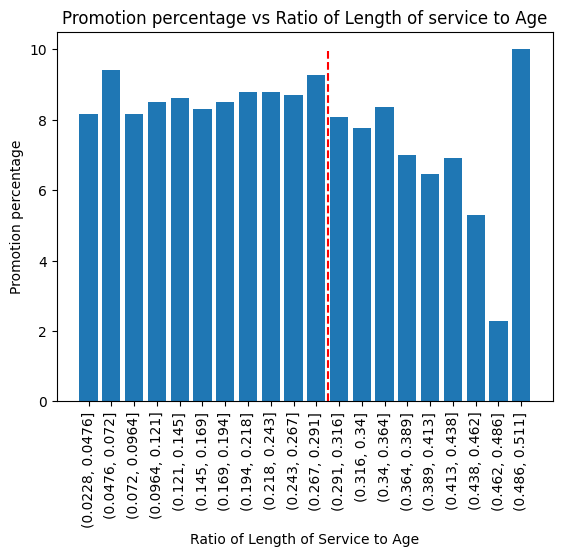

In [ ]:
temp_pi = temp.pivot_table(index = ["range_los_age", "is_promoted"],
                 values = "employee_id",
                 aggfunc = "count").unstack()



temp_pi.columns = temp_pi.columns.get_level_values(1).astype(str)
temp_pi = temp_pi.join(temp["range_los_age"].value_counts())
temp_pi = temp_pi.assign(**{col: temp_pi[col]*100 / temp_pi['count'] for col in ['0', '1']})
temp_pi

plt.bar(np.arange(bi), temp_pi["1"])
x1, y1 = [10.5, 10.5], [0, 10]
plt.plot(x1, y1, color = "red", linestyle = "dashed")
plt.xticks(np.arange(bi),temp_pi.index, rotation = 90)
plt.xlabel("Ratio of Length of Service to Age")
plt.ylabel("Promotion percentage")
plt.title("Promotion percentage vs Ratio of Length of service to Age")

If ratio of Length of service to Age is lesser than 0.30, you have a higher promotion probability. Except for people with ratio in (0.486,0.511]

### New feature - Department wise above or below training score



In [ ]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'new_score', 'start', 'end',
       'mean_new_score', 'los_age'],
      dtype='object')

In [ ]:
temp1 = data[["department", "avg_training_score"]]
temp1

,department,avg_training_score
0,Sales & Marketing,49.0
1,Operations,60.0
2,Sales & Marketing,50.0
3,Sales & Marketing,50.0
4,Technology,73.0
...,...,...
54803,Technology,78.0
54804,Operations,56.0
54805,Analytics,79.0
54806,Sales & Marketing,45.0


In [ ]:
temp = data[["department", "avg_training_score"]].groupby(["department"]).mean()
#temp.loc[row["department"], "avg_training_score"]
#temp.loc[row["department"], "avg_training_score"]
temp

,avg_training_score
department,
Analytics,84.591368
Finance,60.211751
HR,50.028122
Legal,59.860443
Operations,60.215985
Procurement,70.108013
R&D,84.582583
Sales & Marketing,50.273634
Technology,79.915523


In [ ]:
temp1 = data[["department", "avg_training_score"]]
temp1

,department,avg_training_score
0,Sales & Marketing,49.0
1,Operations,60.0
2,Sales & Marketing,50.0
3,Sales & Marketing,50.0
4,Technology,73.0
...,...,...
54803,Technology,78.0
54804,Operations,56.0
54805,Analytics,79.0
54806,Sales & Marketing,45.0


In [ ]:
row["avg_training_score"] > temp.loc[row["department"]].iloc[0]

False

In [ ]:
temp1["training_score_better"] = temp1.apply(lambda row : 1 if (row["avg_training_score"] > temp.loc[row["department"]].iloc[0]) else 0, axis = 1)
data["training_score_better"] = temp1["training_score_better"]
data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,new_score,start,end,mean_new_score,los_age,training_score_better
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1.0,35.0,5.0,8.0,1,0,49.0,0,"(1656.0, 2070.0]",1656.00,2070.0,1863.00,0.228571,0
1,65141,Operations,region_22,Bachelor's,m,other,1.0,30.0,5.0,4.0,0,0,60.0,0,"(2898.0, 3312.0]",2898.00,3312.0,3105.00,0.133333,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1.0,34.0,3.0,7.0,0,0,50.0,0,"(1242.0, 1656.0]",1242.00,1656.0,1449.00,0.205882,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2.0,39.0,1.0,10.0,0,0,50.0,0,"(-4.14, 414.0]",-4.14,414.0,204.93,0.256410,0
4,48945,Technology,region_26,Bachelor's,m,other,1.0,45.0,3.0,2.0,0,0,73.0,0,"(828.0, 1242.0]",828.00,1242.0,1035.00,0.044444,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1.0,48.0,3.0,17.0,0,0,78.0,0,"(-4.14, 414.0]",-4.14,414.0,204.93,0.354167,0
54804,74592,Operations,region_27,Master's & above,f,other,1.0,37.0,2.0,6.0,0,0,56.0,0,"(414.0, 828.0]",414.00,828.0,621.00,0.162162,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1.0,27.0,5.0,3.0,1,0,79.0,0,"(3312.0, 3726.0]",3312.00,3726.0,3519.00,0.111111,0
54806,13614,Sales & Marketing,region_9,X,m,sourcing,1.0,29.0,1.0,2.0,0,0,45.0,0,"(414.0, 828.0]",414.00,828.0,621.00,0.068966,0


In [ ]:
temp_data = data[data["is_promoted"] == 1].pivot_table(index = ["department", "training_score_better"],
                 values = "employee_id",
                 aggfunc = "count").unstack()

temp_data.columns = temp_data.columns.get_level_values(1).astype(str)
temp_data = temp_data.join(data["department"].value_counts())
temp_data = temp_data.assign(**{col: temp_data[col]*100 / temp_data['count'] for col in ['0', '1']})
temp_data["diff"] = temp_data["1"] - temp_data["0"]
temp_data.sort_values(by = ["diff"], axis=0, ascending=True,inplace=True)
temp_data

,0,1,count,diff
department,,,,
R&D,3.103103,3.803804,999,0.700701
HR,2.315964,3.308519,2418,0.992556
Legal,1.636189,3.464870,1039,1.828681
Procurement,3.852620,5.785934,7138,1.933315
Analytics,3.774290,5.792227,5352,2.017937
Sales & Marketing,2.476247,4.726841,16840,2.250594
Operations,3.348608,5.666197,11348,2.317589
Finance,2.720820,5.402208,2536,2.681388
Technology,3.124124,7.635192,7138,4.511068


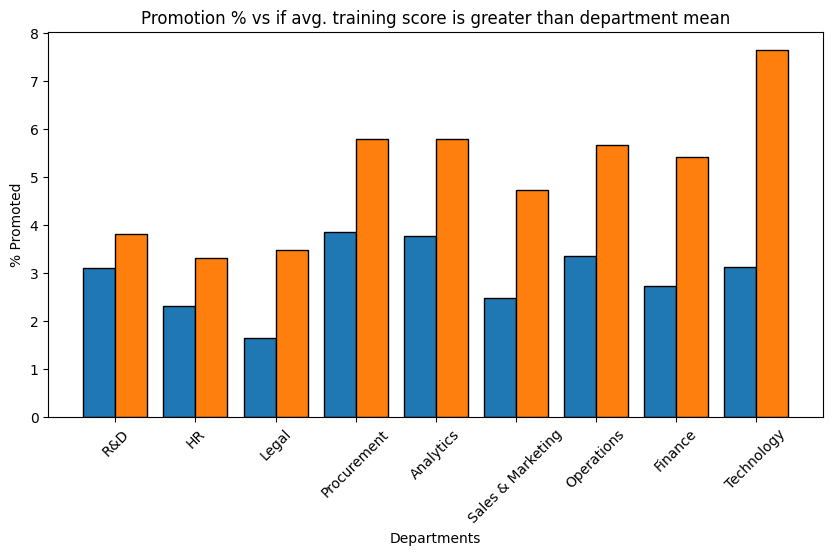

In [ ]:
plt.figure(figsize = (10,5))
r = np.arange(0,18,2)
r1 = r - 0.4
r2 = r + 0.4

plt.bar(r1, temp_data["0"], width = 0.8, edgecolor = "black")
plt.bar(r2, temp_data["1"], width = 0.8, edgecolor = "black")
plt.xticks(r, temp_data.index, rotation = 45)
plt.xlabel("Departments")
plt.ylabel("% Promoted")
plt.title("Promotion % vs if avg. training score is greater than department mean")
plt.show()

Thus it is a common pattern that people with avg. training score greater than the mean of their respective department have a better promotion percentage. Additionally, this difference is extremely high in the Technology department by atleast 100%

Text(0.5, 1.0, 'Difference in Promotion % between people having average training score greater than department mean vs lesser ')

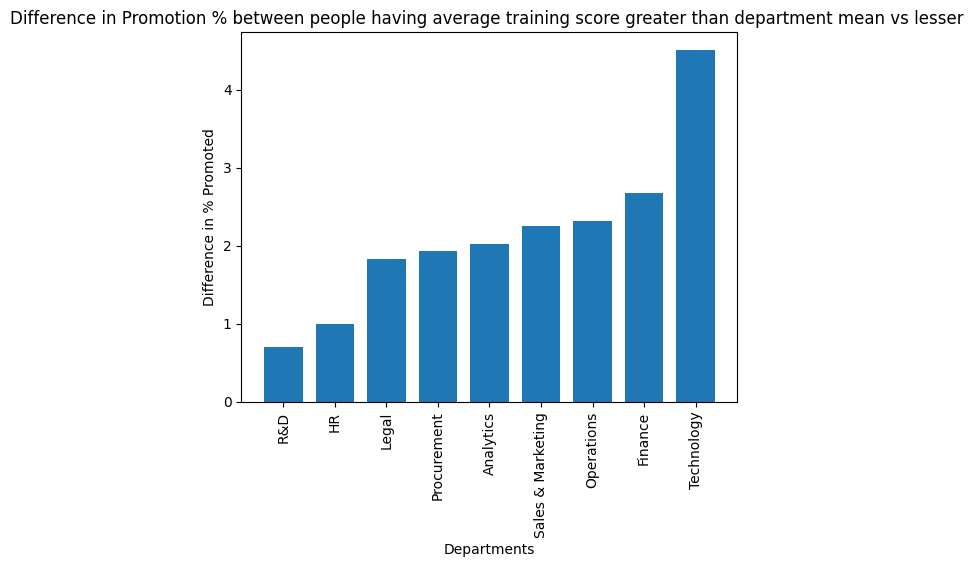

In [ ]:
plt.bar(r, temp_data["diff"], width = 1.5)
plt.xticks(r, temp_data.index, rotation = 90)
plt.xlabel("Departments")
plt.ylabel("Difference in % Promoted")
plt.title("Difference in Promotion % between people having average training score greater than department mean vs lesser ")

People in Technology department having their average training score greater than department average training score have a significantly higher percentage of promotion

### Creating a feature based on KPI, awards one, number of trainings, education and previous year rating and whether training score is greater than department mean and performing a gender wise analysis

Checking department wise male to female promotion % and Promotion ratio between male and female employee in each department

In [ ]:
temp3 = data.groupby(by = ["department", "gender"])["employee_id"].count().unstack()
#temp3.columns = temp3.columns.get_level_values(1).as_type(str)
temp3["ratio"] = temp3["m"]/temp3["f"]
temp3.sort_values(by = "ratio", ascending = [True], inplace = True)


In [ ]:
temp4 = data[data["is_promoted"] == 1].groupby(by = ["department", "gender"])["employee_id"].count().unstack()
#temp4.columns = temp4.columns.get_level
temp4.columns = ["promoted_f", "promoted_m"]
temp4 = temp4.join(temp3)
temp4["promoted_f_per"] = temp4["promoted_f"]/temp4["f"]
temp4["promoted_m_per"] = temp4["promoted_m"]/temp4["m"]
temp4["promoted_ratio"] = temp4["promoted_m_per"]/temp4["promoted_f_per"]
temp4.sort_values(by = ["ratio"], ascending = [True], inplace = True)
temp4

,promoted_f,promoted_m,f,m,ratio,promoted_f_per,promoted_m_per,promoted_ratio
department,,,,,,,,
Procurement,385,303,3287,3851,1.171585,0.117128,0.078681,0.671751
HR,58,78,1006,1412,1.403579,0.057654,0.055241,0.958142
Operations,442,581,4677,6671,1.426342,0.094505,0.087093,0.921574
Technology,277,491,2788,4350,1.560258,0.099354,0.112874,1.136070
Finance,55,151,681,1855,2.723935,0.080764,0.081402,1.007900
Sales & Marketing,176,1037,3154,13686,4.339252,0.055802,0.075771,1.357848
Legal,6,47,149,890,5.973154,0.040268,0.052809,1.311423
Analytics,62,450,513,4839,9.432749,0.120858,0.092994,0.769454
R&D,6,63,57,942,16.526316,0.105263,0.066879,0.635350


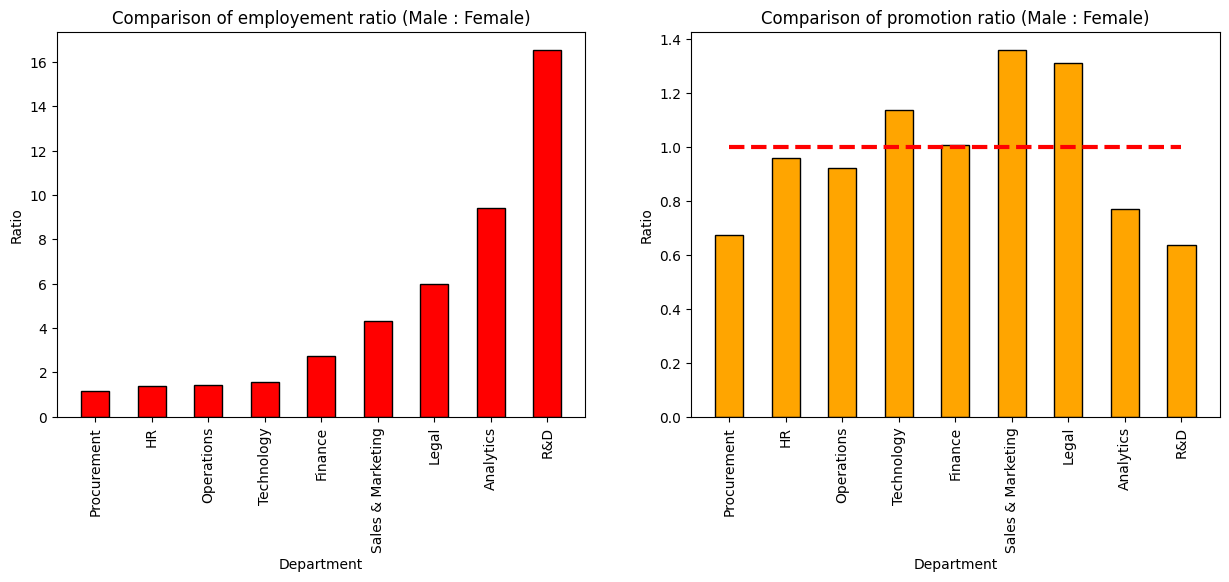

In [ ]:
vars = ["ratio", "promoted_ratio"]
cols = ["red", "orange"]
fig1, ax = plt.subplots(1,2, figsize = (15,5))
r = np.arange(0,27,3)
for i in range(2):
    ax[i].bar(r, temp4[vars[i]], width = 1.5, edgecolor = "black", color = cols[i])
    #ax[i].bar(r, temp4["promoted_ratio"], width = 1, edgecolor = "black", label = "Promotion Ratio")
    ax[i].set_xlabel("Department")
    ax[i].set_ylabel("Ratio")
    ax[i].set_xticks(r)
    ax[i].set_xticklabels(temp4.index, rotation = 90)

x1, y1 = [0, 24], [1, 1]
ax[1].plot(x1, y1, color = "red", linestyle = "dashed", linewidth = 3)
ax[0].set_title("Comparison of employement ratio (Male : Female)")
ax[1].set_title("Comparison of promotion ratio (Male : Female)")
fig1.show()

In [ ]:
def calc_score(row):
    #print(row)
    score = row['KPIs_met >80%'] + row['awards_won?'] + row['previous_year_rating'] + (row['avg_training_score']*row['no_of_trainings']/row['length_of_service']) + row['training_score_better'] + row['education_rating']
    return score

In [ ]:
def edu_encode(x):
    if x == "X":
        return 0
    elif x == 'Below Secondary':
        return 1
    elif x == "Bachelor's":
        return 2
    else:
        return 3

In [ ]:
temp_table = data.copy()
temp_table["education_rating"] = temp_table["education"].apply(edu_encode)
temp_table["score_on_5"] = temp_table.apply(calc_score, axis=1)

In [ ]:
temp_table1 = temp_table.pivot_table(index = ["department", "gender", "is_promoted"],
                       values = "score_on_5",
                       aggfunc = "mean").reset_index()
temp_table1

,department,gender,is_promoted,score_on_5
0,Analytics,f,0,46.787911
1,Analytics,f,1,48.577419
2,Analytics,m,0,42.707768
3,Analytics,m,1,46.840752
4,Finance,f,0,30.933291
5,Finance,f,1,38.458499
6,Finance,m,0,34.880450
7,Finance,m,1,38.552817
8,HR,f,0,22.445101
9,HR,f,1,25.010561


Text(0, 0.5, 'Score')

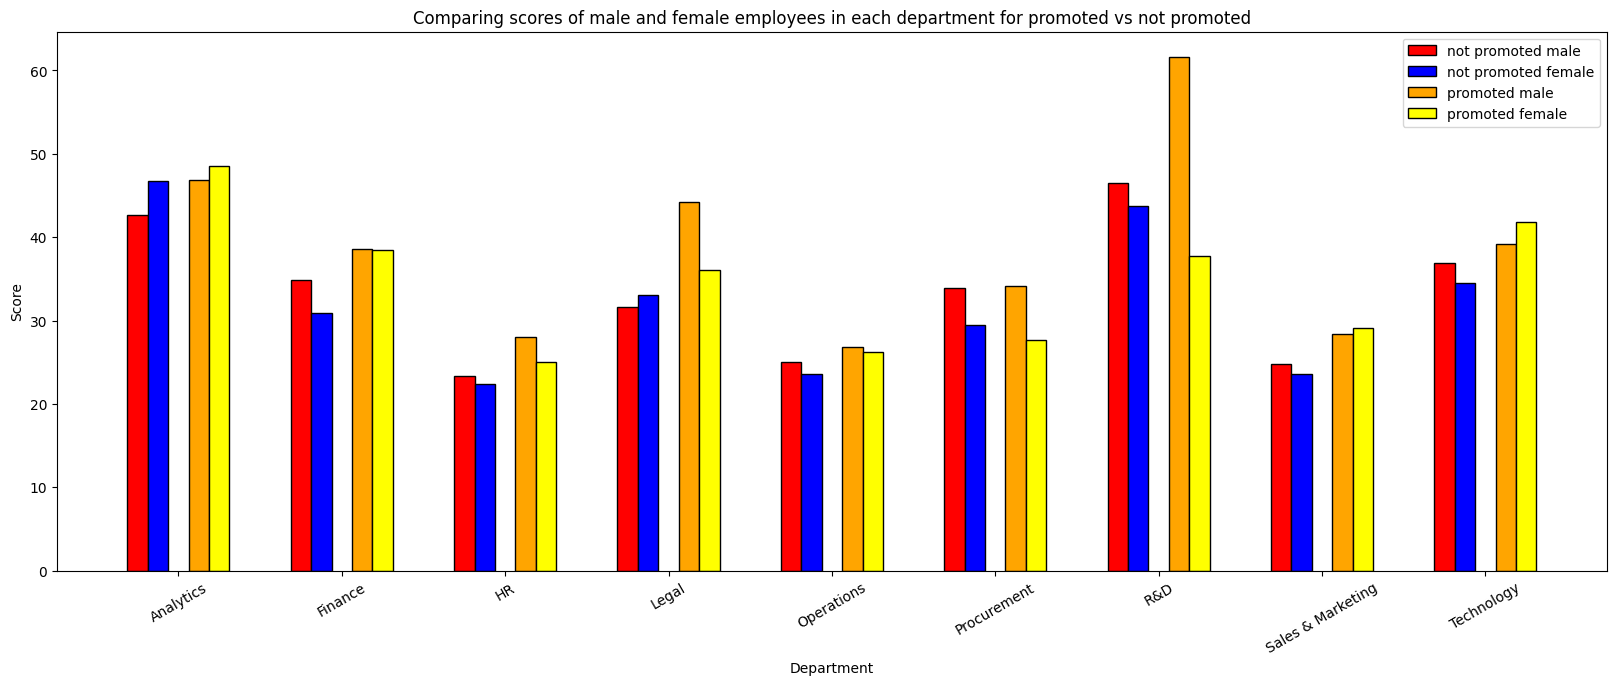

In [ ]:
fig2 = plt.figure(figsize = (20,7))

r = np.arange(0,65,8)
r1 = r - 1
r2 = r - 2
r3 = r + 1
r4 = r + 2

plt.bar(r2, temp_table1.loc[(temp_table1["gender"] == "m") & (temp_table1["is_promoted"] == 0), "score_on_5"], color = "red", width = 1, edgecolor = "black", label = "not promoted male")
plt.bar(r1, temp_table1.loc[(temp_table1["gender"] == "f") & (temp_table1["is_promoted"] == 0), "score_on_5"], color = "blue", width = 1, edgecolor = "black", label = "not promoted female")
plt.bar(r3, temp_table1.loc[(temp_table1["gender"] == "m") & (temp_table1["is_promoted"] == 1), "score_on_5"], color = "orange", width = 1, edgecolor = "black", label = "promoted male")
plt.bar(r4, temp_table1.loc[(temp_table1["gender"] == "f") & (temp_table1["is_promoted"] == 1), "score_on_5"], color = "yellow", width = 1, edgecolor = "black", label = "promoted female")

plt.title("Comparing scores of male and female employees in each department for promoted vs not promoted")
plt.xlabel("Department")
plt.xticks(r, temp_table1.department.unique(), rotation = 30)
plt.legend()
plt.ylabel("Score")

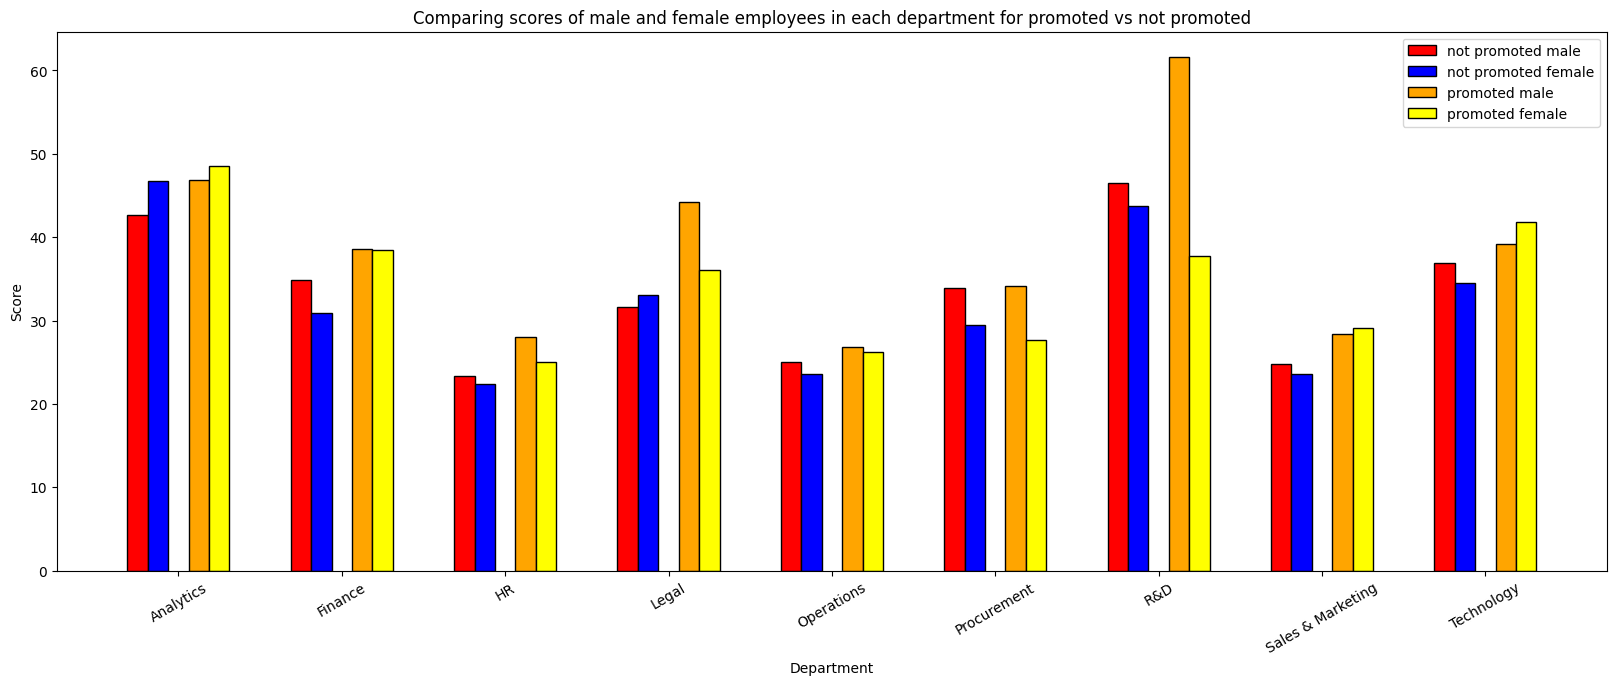

In [ ]:
fig2

Looking at education distribution among departments

In [ ]:
def prom_cnt(x):
    try:
        return tem[(x["department"], x["education"], x["gender"])]
    except:
        return 0

In [ ]:
te = data.groupby(by = ["department", "education","gender"])["employee_id"].count().reset_index()
tem = data[data["is_promoted"] == 1].groupby(by = ["department", "education","gender"])["employee_id"].count()#.reset_index(level = 2)#.drop(["gender"], axis = 1)
te["prom_count"] = te.apply(lambda x : prom_cnt(x), axis = 1)
#te = te.join(tem, rsuffix = "_prom")#.rename(columns = {"employee_id" : "count_total", "employee_id_prom" : "Proomoted_count"}).drop(["gender_prom"],axis = 1)
#te["total_count"]
#te.rename(columns = {"employee_id" : "count"}, inplace = True)
#te = te.unstack().fillna(0).join(data["department"].value_counts())
#te[["Bachelor's", "Below Secondary", "Master's & above", "X"]] = te[["Bachelor's", "Below Secondary", "Master's & above", "X"]].div(te['count'], axis=0)
#te[["Bachelor's", "Below Secondary", "Master's & above", "X"]] = te[["Bachelor's", "Below Secondary", "Master's & above", "X"]]*100
te.rename(columns = {"employee_id" : "total_count"}, inplace = True)
te

,department,education,gender,total_count,prom_count
0,Analytics,Bachelor's,f,450,57
1,Analytics,Bachelor's,m,3528,316
2,Analytics,Master's & above,f,40,3
3,Analytics,Master's & above,m,997,110
4,Analytics,X,f,23,2
...,...,...,...,...,...
59,Technology,Below Secondary,m,128,22
60,Technology,Master's & above,f,844,73
61,Technology,Master's & above,m,1352,159
62,Technology,X,f,37,2


In [ ]:
uniq_lis_dept = te.department.unique()
uniq_lis_edu = te.education.unique()
uniq_lis_gender = te.gender.unique()

dic = {"department" : [],
       "education" : [],
       "gender" : [],
       "total_count" : [],
       "prom_count" : []}

for i in uniq_lis_dept:
    for j in uniq_lis_edu:
        for k in uniq_lis_gender:
            if len(te.loc[(te['department'] == i) & (te["education"] == j) & (te["gender"] == k)]) == 0:
                dic["department"].append(i)
                dic["education"].append(j)
                dic["gender"].append(k)
                dic["total_count"].append(0)
                dic["prom_count"].append(0)
print(dic)
te = pd.concat([te, pd.DataFrame(dic)], ignore_index = True)
te.sort_values(by = ['department', 'education', 'gender'], ascending = [True, True, True], inplace = True)
#sub1.drop(["count", "count_total"], axis = 1, inplace = True)
te

{'department': ['Analytics', 'Analytics', 'Legal', 'R&D', 'R&D', 'R&D', 'Sales & Marketing', 'Sales & Marketing'], 'education': ['Below Secondary', 'Below Secondary', 'X', 'X', 'Below Secondary', 'Below Secondary', 'Below Secondary', 'Below Secondary'], 'gender': ['f', 'm', 'f', 'f', 'f', 'm', 'f', 'm'], 'total_count': [0, 0, 0, 0, 0, 0, 0, 0], 'prom_count': [0, 0, 0, 0, 0, 0, 0, 0]}


,department,education,gender,total_count,prom_count
0,Analytics,Bachelor's,f,450,57
1,Analytics,Bachelor's,m,3528,316
64,Analytics,Below Secondary,f,0,0
65,Analytics,Below Secondary,m,0,0
2,Analytics,Master's & above,f,40,3
...,...,...,...,...,...
59,Technology,Below Secondary,m,128,22
60,Technology,Master's & above,f,844,73
61,Technology,Master's & above,m,1352,159
62,Technology,X,f,37,2


In [ ]:
te["percentage"] = te["prom_count"]*100/te["total_count"]
te.fillna(0, inplace = True)
te = te.drop(["total_count", "prom_count"], axis = 1)
te

,department,education,gender,percentage
0,Analytics,Bachelor's,f,12.666667
1,Analytics,Bachelor's,m,8.956916
64,Analytics,Below Secondary,f,0.000000
65,Analytics,Below Secondary,m,0.000000
2,Analytics,Master's & above,f,7.500000
...,...,...,...,...
59,Technology,Below Secondary,m,17.187500
60,Technology,Master's & above,f,8.649289
61,Technology,Master's & above,m,11.760355
62,Technology,X,f,5.405405


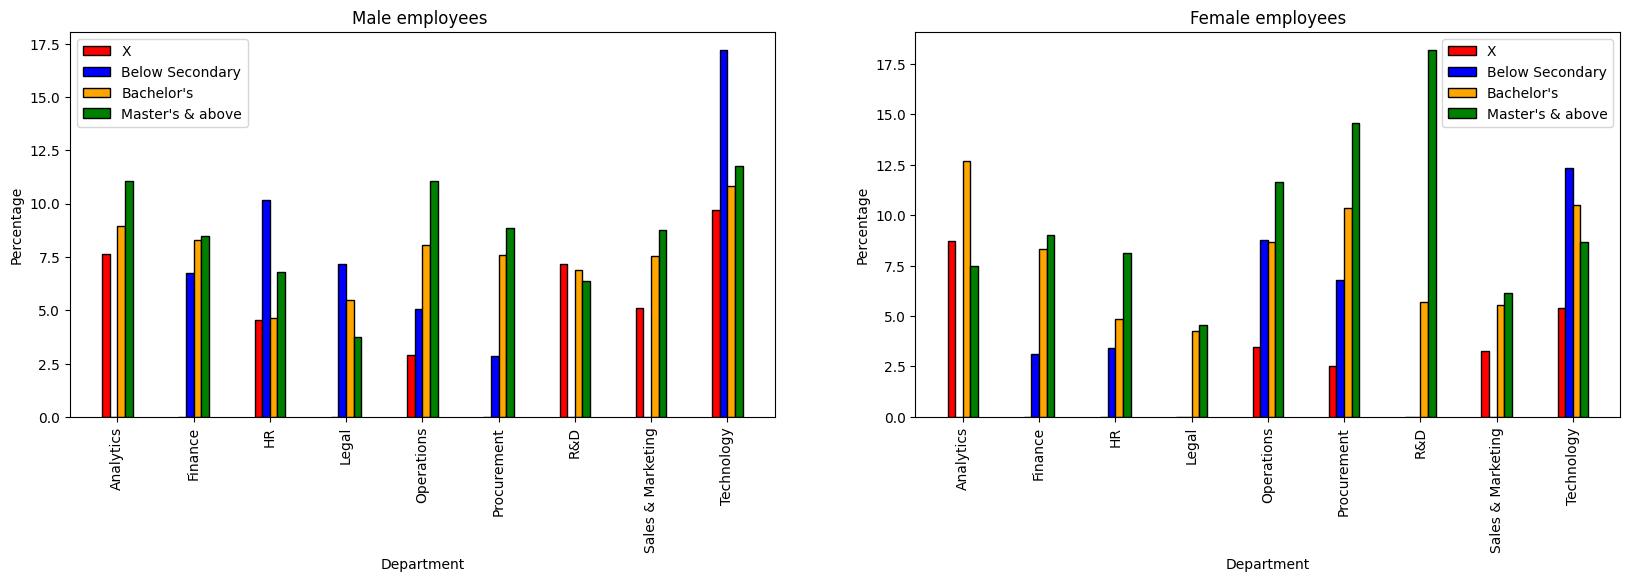

In [ ]:
vars = ["m", "f"]
cols = ["red","blue", "orange", "green"]
fig3, ax = plt.subplots(1,2, figsize = (20,5))
r = np.arange(0,81,10)
r1 = r - 0.5
r2 = r - 1.5
r3 = r + 0.5
r4 = r + 1.5
for i in range(2):
    ax[i].bar(r2, te.loc[(te["education"] == "X") & (te["gender"] == vars[i]),"percentage"], width = 1, edgecolor = "black", color = cols[0], label = "X")
    ax[i].bar(r1, te.loc[(te["education"] == "Below Secondary") & (te["gender"] == vars[i]),"percentage"], width = 1, edgecolor = "black", color = cols[1], label = "Below Secondary")
    ax[i].bar(r3, te.loc[(te["education"] == "Bachelor's") & (te["gender"] == vars[i]),"percentage"], width = 1, edgecolor = "black", color = cols[2], label = "Bachelor's")
    ax[i].bar(r4, te.loc[(te["education"] == "Master's & above") & (te["gender"] == vars[i]),"percentage"], width = 1, edgecolor = "black", color = cols[3], label = "Master's & above")
    #ax[i].bar(r, temp4["promoted_ratio"], width = 1, edgecolor = "black", label = "Promotion Ratio")
    ax[i].set_xlabel("Department")
    ax[i].set_ylabel("Percentage")
    ax[i].set_xticks(r)
    ax[i].legend()
    ax[i].set_xticklabels(te.department.unique(), rotation = 90)


ax[0].set_title("Male employees ")
ax[1].set_title("Female employees")
fig3.show()

Of the women in RnD department, a woman with a Masters degree had a much higher chance of promotion compared to a woman holding a Bachelors degree. This was consistent mostly for women across all departments. However, for men, this criteria was not true

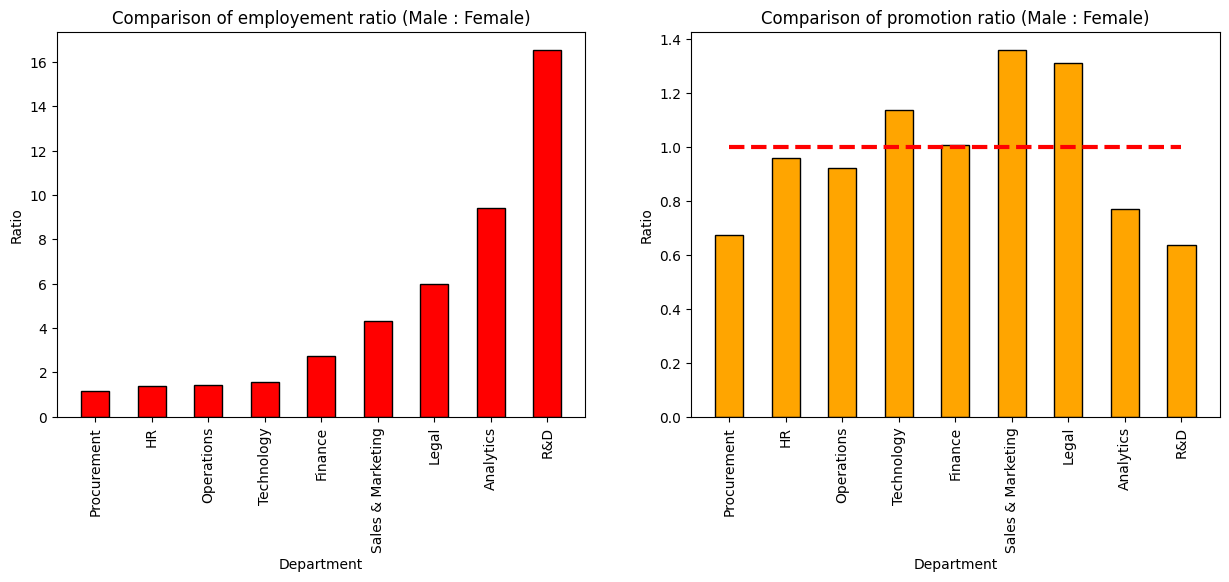

In [ ]:
fig1

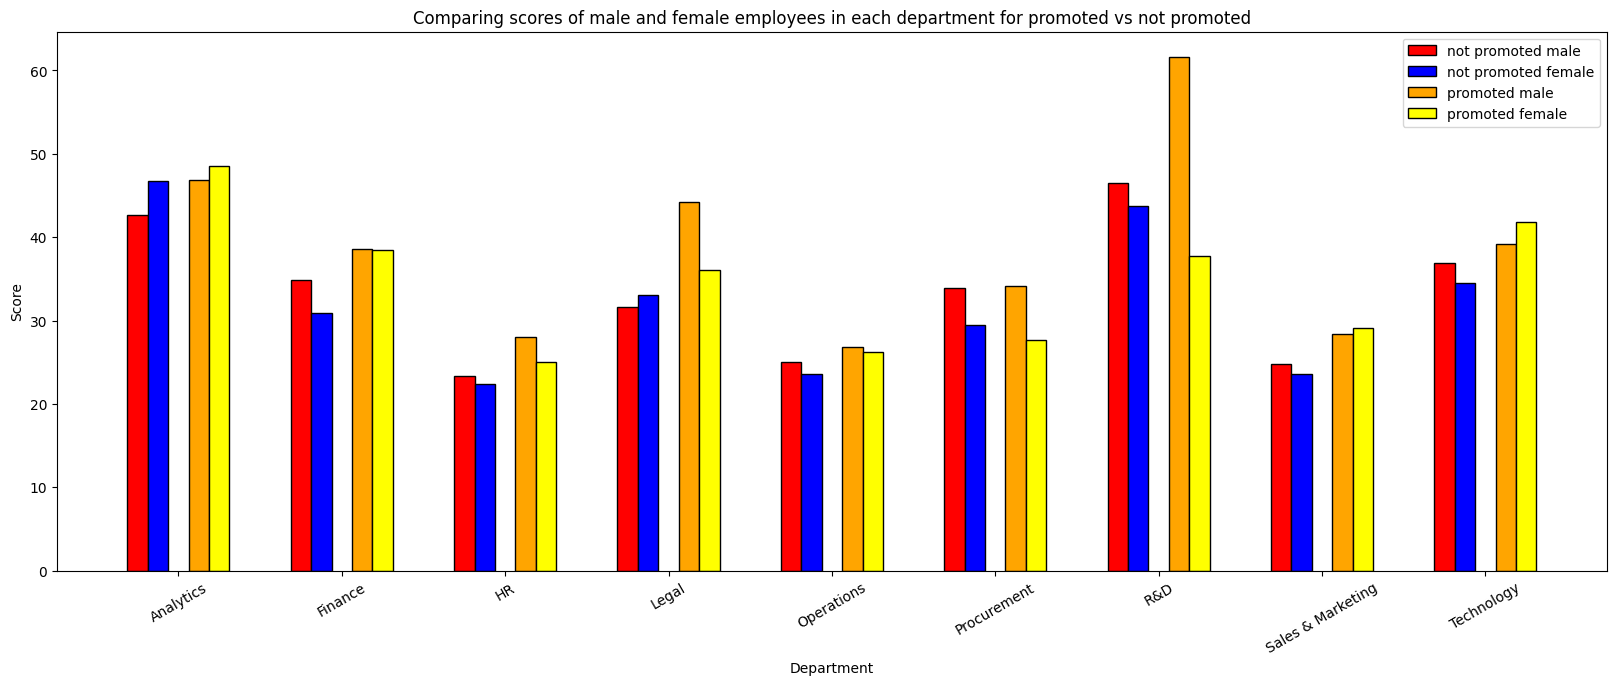

In [ ]:
fig2

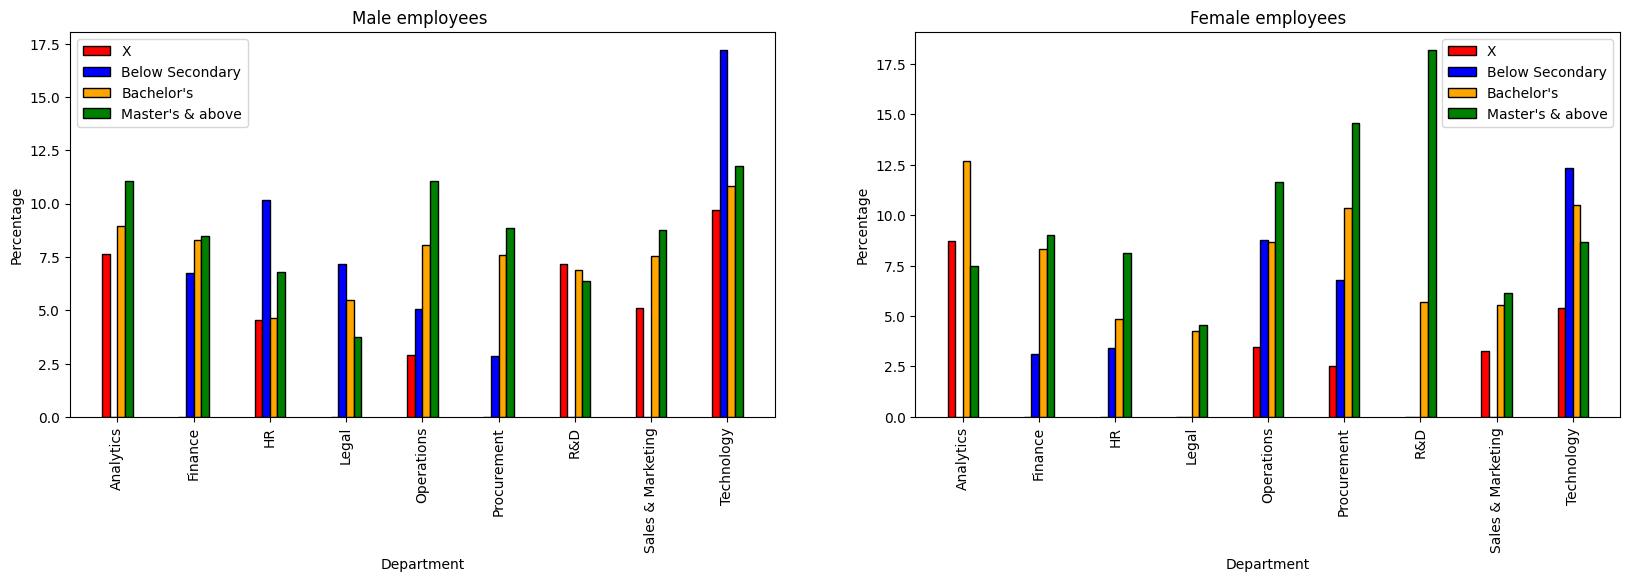

In [ ]:
fig3

# One hot encoding and Label encoding

In [ ]:
from sklearn import preprocessing

In [ ]:
data.columns
data.drop(["start", "end", "new_score", "mean_new_score"], axis = 1, inplace = True)

In [ ]:
copy_data = data.copy()

In [ ]:
region_order = copy_data[copy_data["is_promoted"] == 1].groupby(by = ["region"])["is_promoted"].count().sort_values()

In [ ]:
#label encoding
label_encoder = preprocessing.LabelEncoder()
region_order1 = label_encoder.fit_transform(region_order)
region_order = pd.DataFrame(region_order1, index = region_order.index)

In [ ]:
print(label_encoder)

LabelEncoder()


In [ ]:
region_order

,0
region,
region_18,0
region_9,1
region_34,1
region_33,2
region_21,3
region_24,3
region_6,4
region_12,5
region_5,6


In [ ]:
region_order.to_csv("label_encoding_order.csv", sep=',', index=True, encoding='utf-8')

In [ ]:
copy_data["region"] = copy_data["region"].apply(lambda x : region_order.loc[x])
copy_data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,los_age,training_score_better
0,65438,Sales & Marketing,28,Master's & above,f,sourcing,1.0,35.0,5.0,8.0,1,0,49.0,0,0.228571,0
1,65141,Operations,29,Bachelor's,m,other,1.0,30.0,5.0,4.0,0,0,60.0,0,0.133333,0
2,7513,Sales & Marketing,12,Bachelor's,m,sourcing,1.0,34.0,3.0,7.0,0,0,50.0,0,0.205882,0
3,2542,Sales & Marketing,22,Bachelor's,m,other,2.0,39.0,1.0,10.0,0,0,50.0,0,0.256410,0
4,48945,Technology,23,Bachelor's,m,other,1.0,45.0,3.0,2.0,0,0,73.0,0,0.044444,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,15,Bachelor's,m,sourcing,1.0,48.0,3.0,17.0,0,0,78.0,0,0.354167,0
54804,74592,Operations,21,Master's & above,f,other,1.0,37.0,2.0,6.0,0,0,56.0,0,0.162162,0
54805,13918,Analytics,13,Bachelor's,m,other,1.0,27.0,5.0,3.0,1,0,79.0,0,0.111111,0
54806,13614,Sales & Marketing,1,X,m,sourcing,1.0,29.0,1.0,2.0,0,0,45.0,0,0.068966,0


In [ ]:
#One hot encoding
col_str = list(copy_data.columns[(copy_data.dtypes == object) | (copy_data.dtypes == 'category')])
#col_str.remove("gender")
col_str.remove("gender")
col_str

['department', 'education', 'recruitment_channel']

In [ ]:
copy_data = pd.get_dummies(copy_data, columns = col_str, drop_first = False)
copy_data = pd.get_dummies(copy_data, columns = ["gender"], drop_first = True)
copy_data.shape

(54808, 29)

# Heatmap

In [ ]:
for col in list(copy_data.columns):
    copy_data[col] = copy_data[col].apply(lambda x : float(x) if col not in ["employee_id", "is_promoted"] else x)

<Axes: >

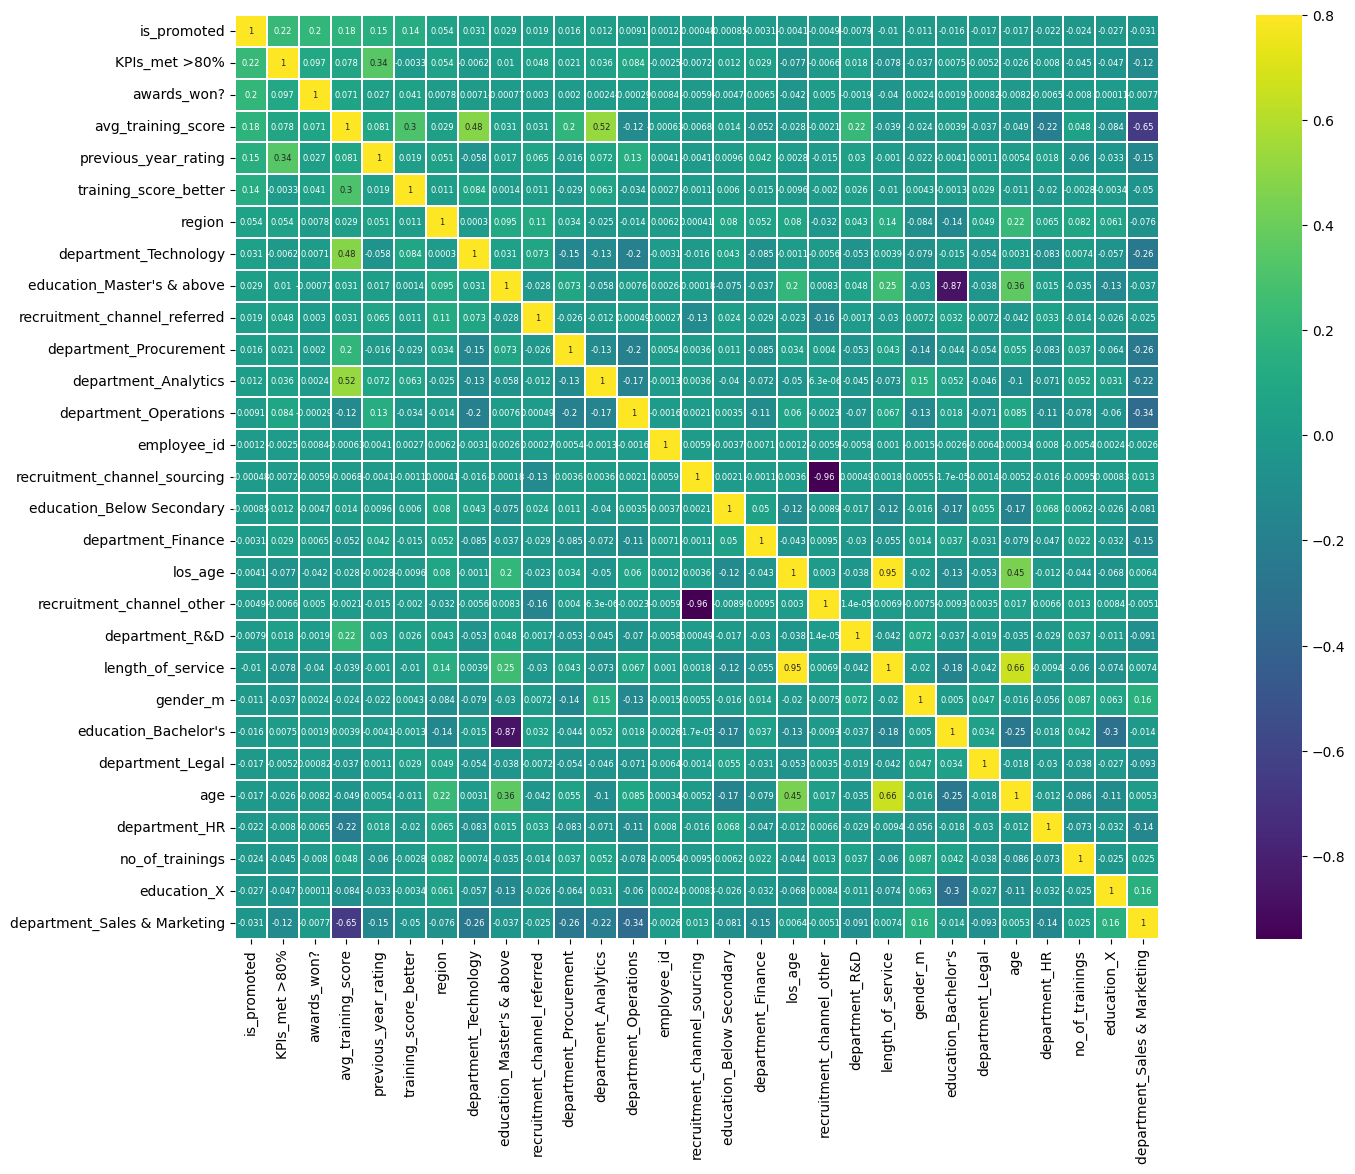

In [ ]:
k= copy_data.select_dtypes(include=[np.number]).columns.size
correlation = copy_data.select_dtypes(include=[np.number]).corr()
#Build correlation matrix for target variable
cols = correlation.nlargest(k,'is_promoted')['is_promoted'].index
cm = np.corrcoef(copy_data[cols].values.T)
f , ax = plt.subplots(figsize = (25,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':6},yticklabels = cols.values)

In [ ]:
# Normalize the data
from sklearn import preprocessing
# Drop the target variable, ID, and non-relevant features
data_normalized = copy_data.drop(['employee_id', 'is_promoted'], axis=1)
data_normalized = pd.DataFrame(preprocessing.scale(data_normalized), columns = data_normalized.columns)
data_normalized.describe()

,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,los_age,training_score_better,...,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,education_X,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,gender_m
count,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,...,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04
mean,1.593302e-16,-1.073437e-16,-3.609238e-16,7.506281e-17,1.008616e-16,1.322350e-17,7.130319e-19,5.490345e-17,-5.807969e-17,-2.981770e-17,...,4.686564e-17,-1.866847e-17,-1.216043e-16,-2.774342e-17,3.357732e-17,6.871034e-18,-9.256450e-17,2.553950e-17,-1.348278e-17,3.292911e-17
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,...,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-2.719622e+00,-4.341197e-01,-1.676871e+00,-1.912321e+00,-1.159757e+00,-7.369860e-01,-1.540178e-01,-1.453758e+00,-1.537678e+00,-8.430412e-01,...,-6.659815e-01,-3.869597e-01,-1.421814e+00,-1.220925e-01,-6.117349e-01,-2.144159e-01,-1.117915e+00,-1.458759e-01,-8.573735e-01,-1.536223e+00
25%,-6.635744e-01,-4.341197e-01,-7.602525e-01,-2.711697e-01,-6.813506e-01,-7.369860e-01,-1.540178e-01,-9.287472e-01,-8.033687e-01,-8.430412e-01,...,-6.659815e-01,-3.869597e-01,-1.421814e+00,-1.220925e-01,-6.117349e-01,-2.144159e-01,-1.117915e+00,-1.458759e-01,-8.573735e-01,-1.536223e+00
50%,4.249215e-01,-4.341197e-01,-2.364703e-01,-2.711697e-01,-2.029440e-01,-7.369860e-01,-1.540178e-01,-2.537336e-01,-1.467319e-01,-8.430412e-01,...,-6.659815e-01,-3.869597e-01,7.033268e-01,-1.220925e-01,-6.117349e-01,-2.144159e-01,8.945227e-01,-1.458759e-01,-8.573735e-01,6.509473e-01
75%,7.877534e-01,-4.341197e-01,5.492029e-01,5.494061e-01,2.754626e-01,1.356878e+00,-1.540178e-01,9.462906e-01,6.428975e-01,1.186182e+00,...,1.501543e+00,-3.869597e-01,7.033268e-01,-1.220925e-01,1.634695e+00,-2.144159e-01,8.945227e-01,-1.458759e-01,1.166353e+00,6.509473e-01
max,9.086974e-01,4.837645e+00,3.168114e+00,1.369982e+00,4.341919e+00,1.356878e+00,6.492758e+00,2.296318e+00,3.970055e+00,1.186182e+00,...,1.501543e+00,2.584249e+00,7.033268e-01,8.190511e+00,1.634695e+00,4.663834e+00,8.945227e-01,6.855144e+00,1.166353e+00,6.509473e-01


# Machine Learning

In [ ]:
#pip install bayesian-optimization

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
# Split the data into train and test data
feature_cols = copy_data.drop(['employee_id', 'is_promoted'], axis = 1).columns
X = data_normalized[feature_cols]
y = copy_data.is_promoted
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=3)
display(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(36721, 27)

(18087, 27)

(36721,)

(18087,)

In [ ]:
regr = LinearRegression()
regr.fit(X_train, y_train)
regr.predict(X_val)

array([0.00456668, 0.03679325, 0.08420992, ..., 0.02580692, 0.16965913,
       0.2409482 ])

Decision Tree

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_val)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     16564
           1       0.41      0.46      0.43      1523

    accuracy                           0.90     18087
   macro avg       0.68      0.70      0.69     18087
weighted avg       0.90      0.90      0.90     18087



In [ ]:
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

Accuracy: 0.8989329352573672


In [ ]:
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dtree_reg = DecisionTreeClassifier() # Initialize a decision tree regressor
grid_search = GridSearchCV(estimator=dtree_reg, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_dtree_reg = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred = best_dtree_reg.predict(X_val)
#mse = mean_squared_error(y_val, y_pred)
##rmse = mse ** 0.5
best_params = grid_search.best_params_
#print(f"Best parameters: {best_params}")
#print(f"Test RMSE: {rmse}")
print(classification_report(y_val,y_pred))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     16564
           1       0.81      0.31      0.45      1523

    accuracy                           0.94     18087
   macro avg       0.88      0.65      0.71     18087
weighted avg       0.93      0.94      0.92     18087



SVM

In [ ]:
'''from sklearn.svm import SVC
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

# Make Prediction & print the result
y_pred = grid.predict(X_val)
print(classification_report(y_val,y_pred))'''

"from sklearn.svm import SVC\n# defining parameter range\nparam_grid = {'C': [0.1, 1, 10, 100, 1000],\n              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],\n              'kernel': ['rbf']}\n\ngrid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)\n\n# fitting the model for grid search\ngrid.fit(X_train, y_train)\n\n# Make Prediction & print the result\ny_pred = grid.predict(X_val)\nprint(classification_report(y_val,y_pred))"

Logistic Regression

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

y_pred = logreg_cv.predict(X_val)
print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred))

tuned hpyerparameters :(best parameters)  {'C': 100.0, 'penalty': 'l2'}
accuracy : 0.9362218378593836
[[16467    97]
 [ 1068   455]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     16564
           1       0.82      0.30      0.44      1523

    accuracy                           0.94     18087
   macro avg       0.88      0.65      0.70     18087
weighted avg       0.93      0.94      0.92     18087



Random Forest

In [ ]:
rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     16564
           1       0.86      0.29      0.44      1523

    accuracy                           0.94     18087
   macro avg       0.90      0.65      0.70     18087
weighted avg       0.93      0.94      0.92     18087



In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_val, y_pred)

0.43954968184043075

In [ ]:
import xgboost as xgb

# Initialize the XGBoost classifier
xg_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='error')

# Train the model
xg_clf.fit(X_train, y_train)

# Make predictions
y_pred = xg_clf.predict(X_val)

print("Classification Report:")
print(classification_report(y_val, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     16564
           1       0.89      0.35      0.51      1523

    accuracy                           0.94     18087
   macro avg       0.92      0.68      0.74     18087
weighted avg       0.94      0.94      0.93     18087



In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'colsample_bytree': [0.3, 0.7, 1.0],
    'subsample': [0.5, 0.8, 1.0],
    'gamma': [0, 0.1, 0.5]
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=xg_clf, param_grid=param_grid, cv=3, scoring='f1', verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='error', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=No...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.3, 0.7, 1.0],
                         'gamma': [0, 0.1, 0.5],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.5, 0.8, 1.0]},
             scoring='f1', verbose=1)

In [ ]:
print("Best Hyperparameters:", grid_search.best_params_)

# Test the model with the best hyperparameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)

Best Hyperparameters: {'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}


In [ ]:
print("Classification Report:")
print(classification_report(y_val, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     16564
           1       0.91      0.35      0.50      1523

    accuracy                           0.94     18087
   macro avg       0.92      0.67      0.74     18087
weighted avg       0.94      0.94      0.93     18087



In [ ]:
import joblib

# Assuming 'model' is your trained model
joblib.dump(best_model, 'model_xgb.pkl')

# To load the model later
#model = joblib.load('model_filename.pkl')

['model_xgb.pkl']

In [ ]:
print(best_model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [ ]:
data.shape

(54808, 16)